<a href="https://colab.research.google.com/github/CGnal/agos-ai-course/blob/master/day3/3_1_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-4jhiscy6
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-4jhiscy6
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=155802 sha256=39bb9c1d51b9cd6ae649099dbb436ac243dd4260ac35ac982e94ee5166c695bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-m6tj6de4/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [2]:
!pip install keract

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
%load_ext tensorboard
import tensorboard
tensorboard.__version__

'2.7.0'

In [5]:
from keract import get_activations
from keract import display_activations

In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Fashion MNIST using CNN 

We see how we can construct a simple CNN model to see how it performs on our fashion mnist dataset 

## CNNs
https://en.wikipedia.org/wiki/Kernel_(image_processing)

1. Take matrices (or kernels) and pass it over an image. 
2. Passing over the image means we are doing something like a fourier convolutional operation.
3. This way we change underlying pixels using this matrix. 
4. We obtain multiple activation maps(or feature maps), one for each kernel, each holding some specific feature for that image.
5. We can do stuff like edge detection where you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

## Load dataset 

In [7]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
train_images.shape

(60000, 28, 28, 1)

## Define the model 

Conv->MaxPooling->Conv->MaxPooling->Flatten


### Conv layer

```
Args:
  filters: Integer, the dimensionality of the output space (i.e. the number of
    output filters in the convolution).
  kernel_size: An integer or tuple/list of 2 integers, specifying the height
    and width of the 2D convolution window. Can be a single integer to specify
    the same value for all spatial dimensions.
  strides: An integer or tuple/list of 2 integers, specifying the strides of
    the convolution along the height and width. Can be a single integer to
    specify the same value for all spatial dimensions. Specifying any stride
    value != 1 is incompatible with specifying any `dilation_rate` value != 1.
  padding: one of `"valid"` or `"same"` (case-insensitive).
    `"valid"` means no padding. `"same"` results in padding with zeros evenly
    to the left/right or up/down of the input. When `padding="same"` and
    `strides=1`, the output has the same size as the input.
```

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name='conv_1'), #28 height 28 width 1 channel
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', name='conv_2'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', name='conv_3'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_2')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

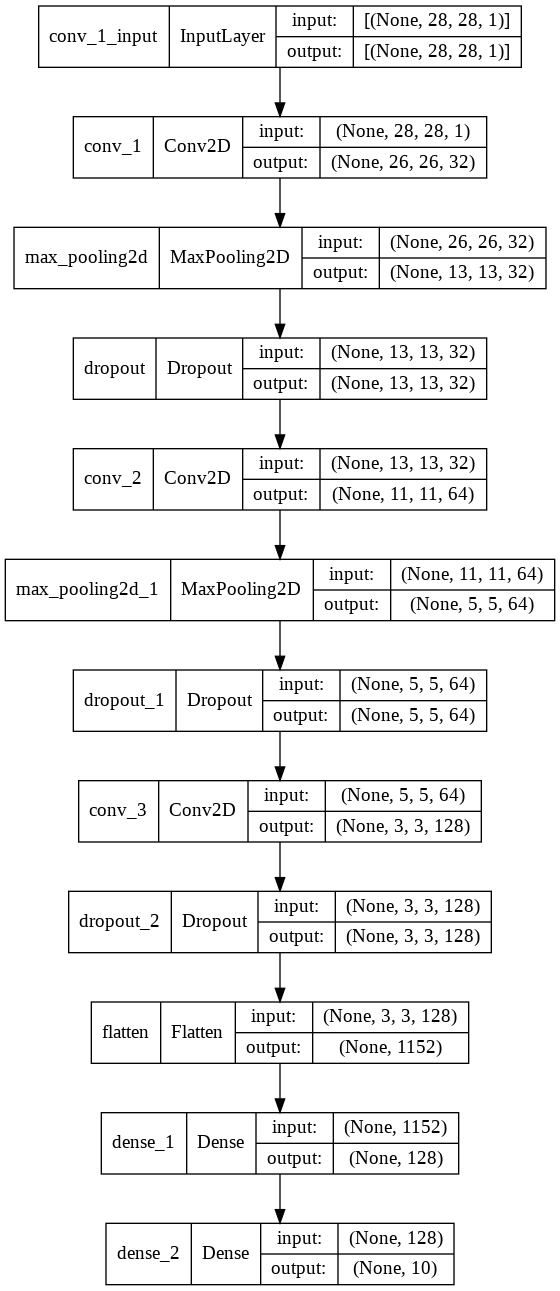

In [11]:
plot_model(model, show_shapes=True)

In [12]:
%%time

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)

history = model.fit(train_images, train_labels, epochs=100, batch_size=1000,
                    callbacks=[earlystopping],
                    shuffle=True, validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 33s 52ms/step - loss: 1.1672 - accuracy: 0.5664 - val_loss: 0.6859 - val_accuracy: 0.7473
Epoch 2/100
48/48 [==============================] - 2s 49ms/step - loss: 0.6466 - accuracy: 0.7533 - val_loss: 0.5610 - val_accuracy: 0.7928
Epoch 3/100
48/48 [==============================] - 2s 46ms/step - loss: 0.5594 - accuracy: 0.7888 - val_loss: 0.4808 - val_accuracy: 0.8242
Epoch 4/100
48/48 [==============================] - 2s 46ms/step - loss: 0.5024 - accuracy: 0.8112 - val_loss: 0.4406 - val_accuracy: 0.8400
Epoch 5/100
48/48 [==============================] - 2s 46ms/step - loss: 0.4703 - accuracy: 0.8243 - val_loss: 0.4120 - val_accuracy: 0.8512
Epoch 6/100
48/48 [==============================] - 2s 46ms/step - loss: 0.4412 - accuracy: 0.8384 - val_loss: 0.3955 - val_accuracy: 0.8572
Epoch 7/100
48/48 [==============================] - 2s 46ms/step - loss: 0.4190 - accuracy: 0.8464 - val_loss: 0.3627 - val_accuracy: 0.8666
Epoch

In [13]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2340 - accuracy: 0.9175

Test accuracy:  0.9175000190734863


## Visualizing activation maps

### Keract : Activations + Gradients

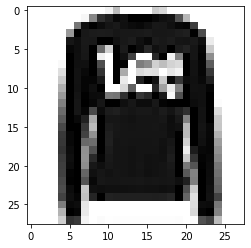

In [14]:
plt.imshow(test_images[1][:,:,0], plt.cm.binary)

In [15]:
activations = get_activations(model, train_images[1:2, :, :, :])
activations_filtered = {k:v for k,v in activations.items() 
                        if k in ['conv_1', 'conv_2', 'conv_3', 'dense_1', 'dense_2']}

conv_1 (1, 26, 26, 32) 


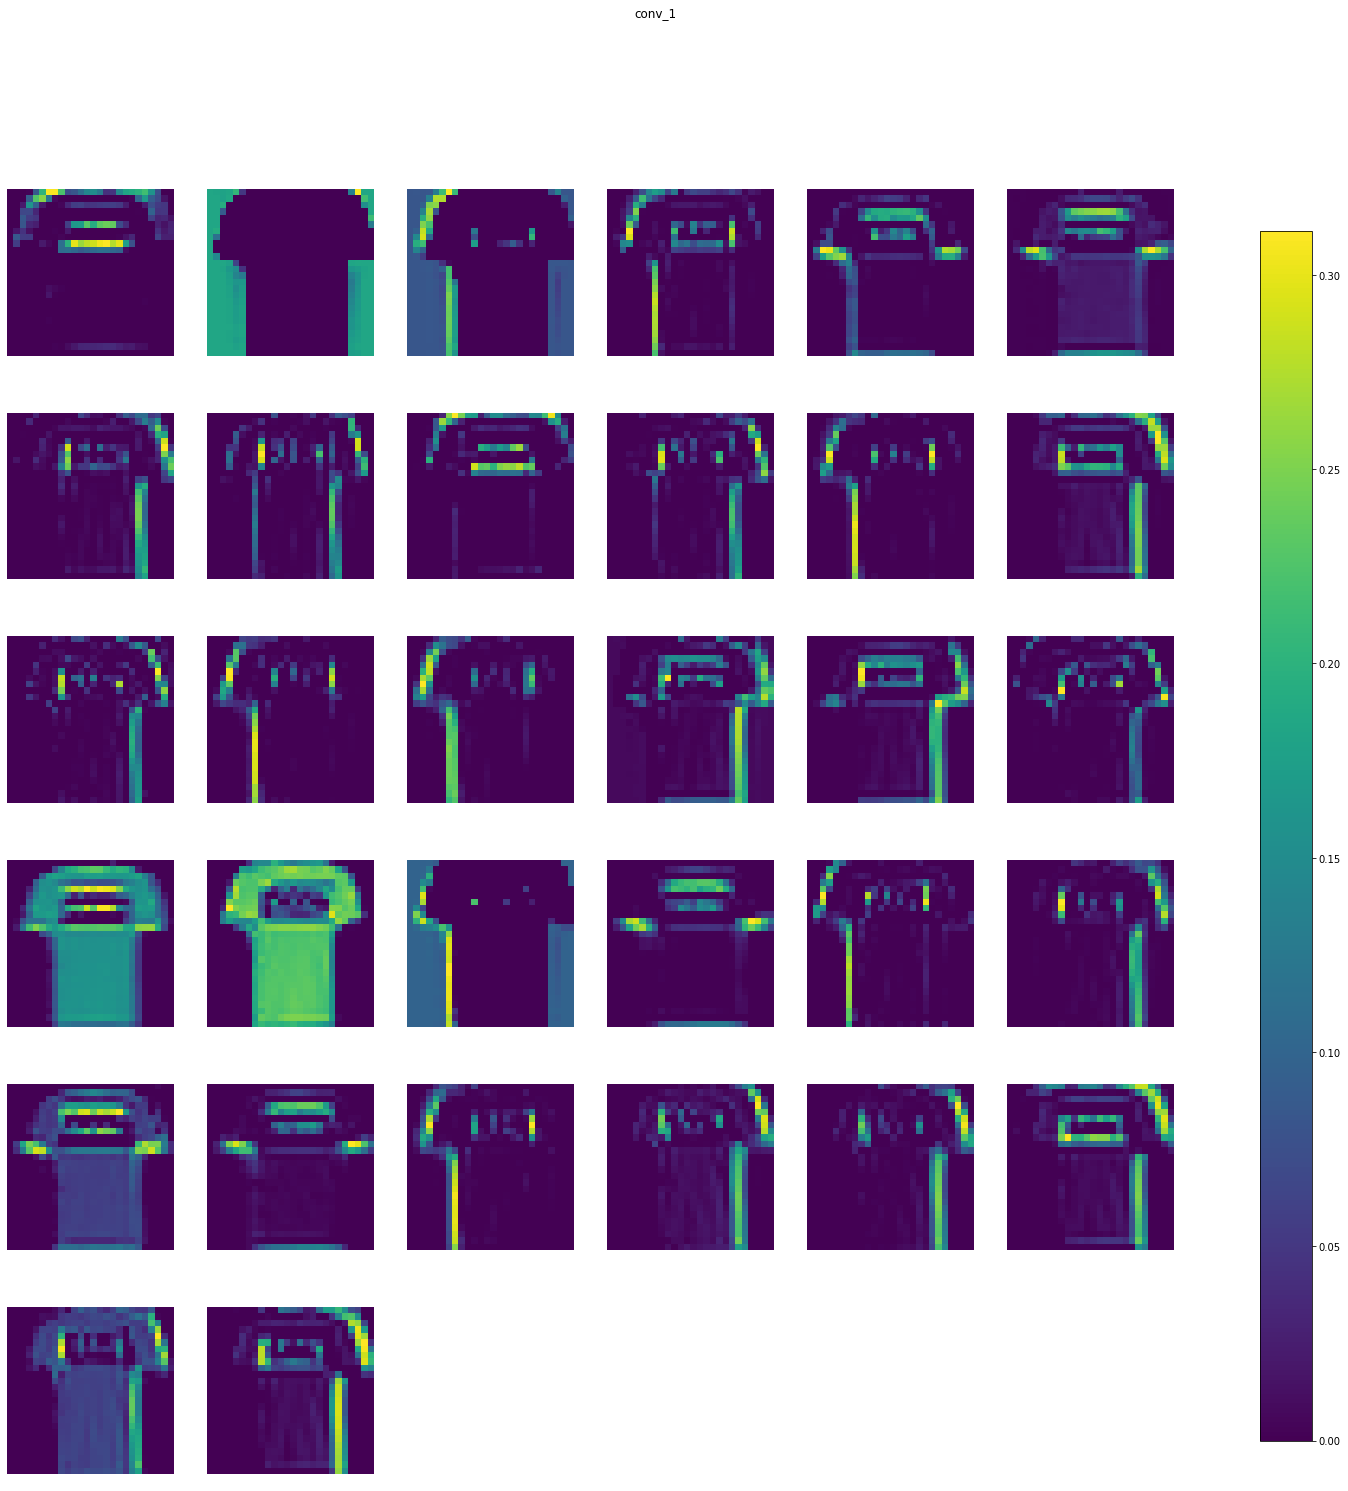

conv_2 (1, 11, 11, 64) 


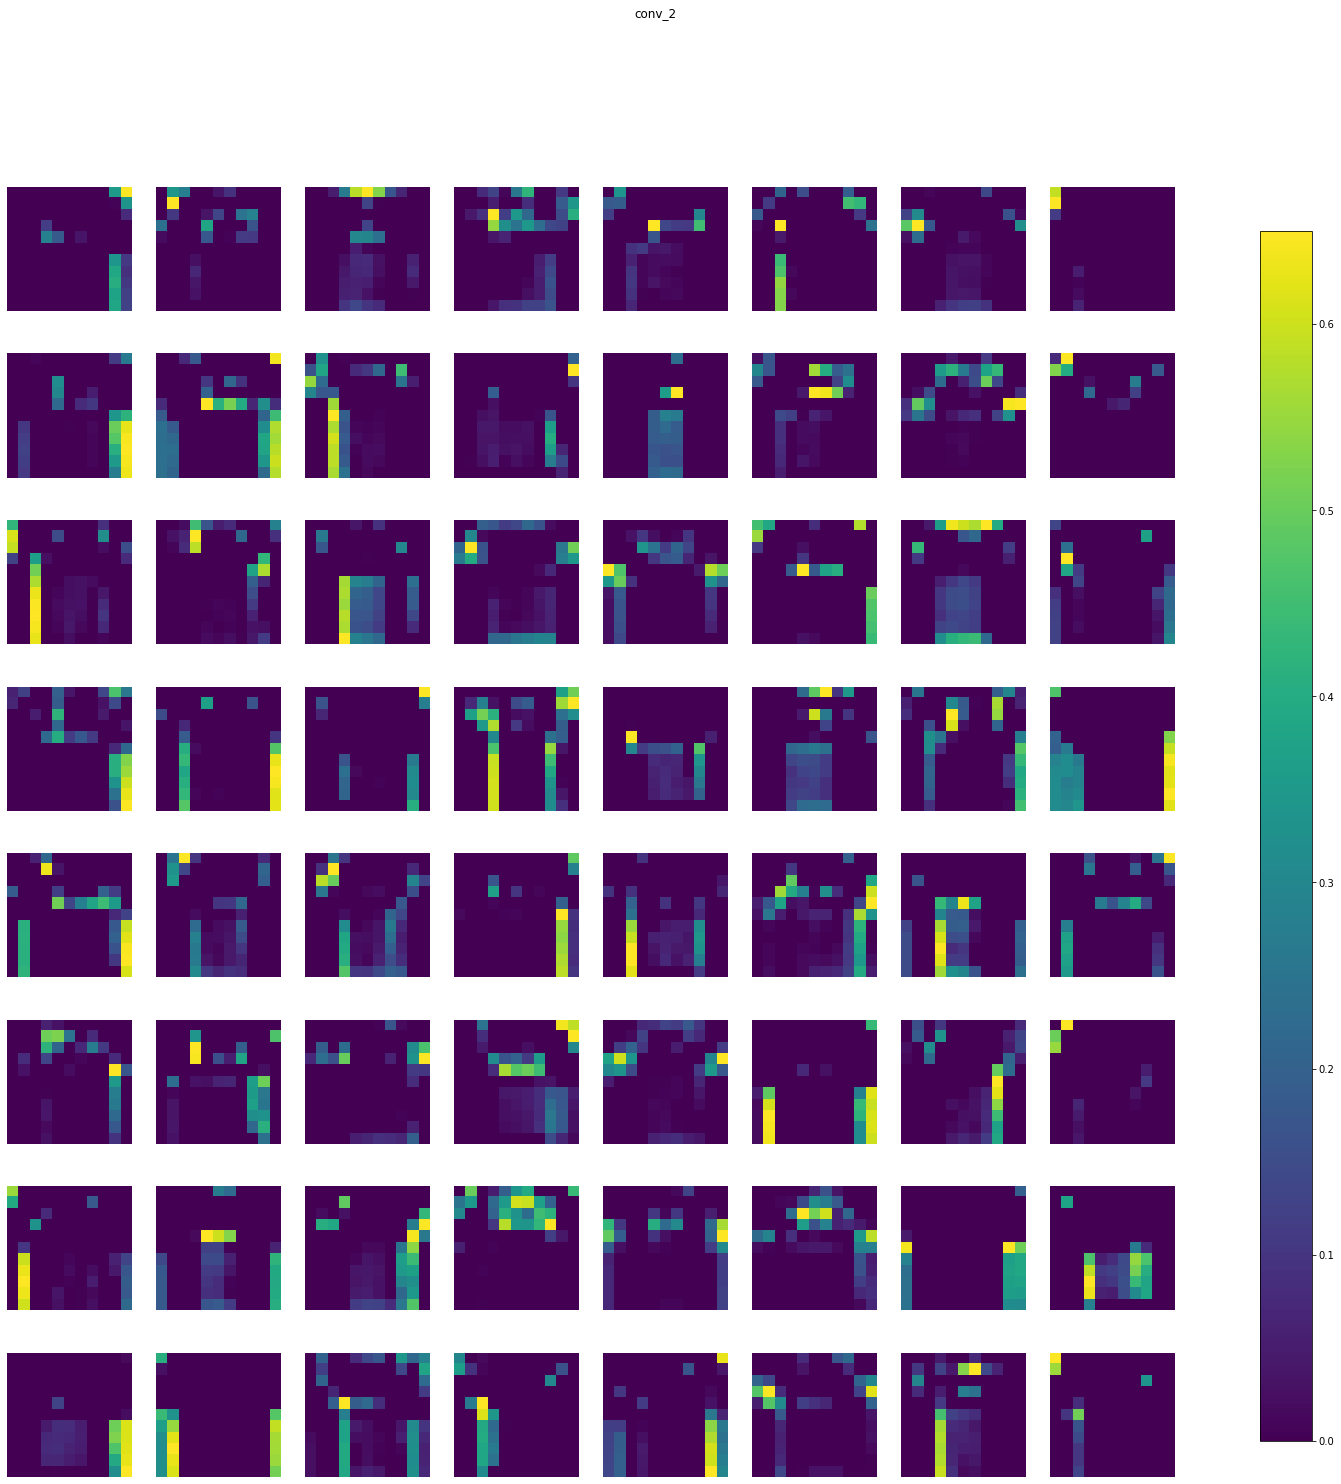

conv_3 (1, 3, 3, 128) 


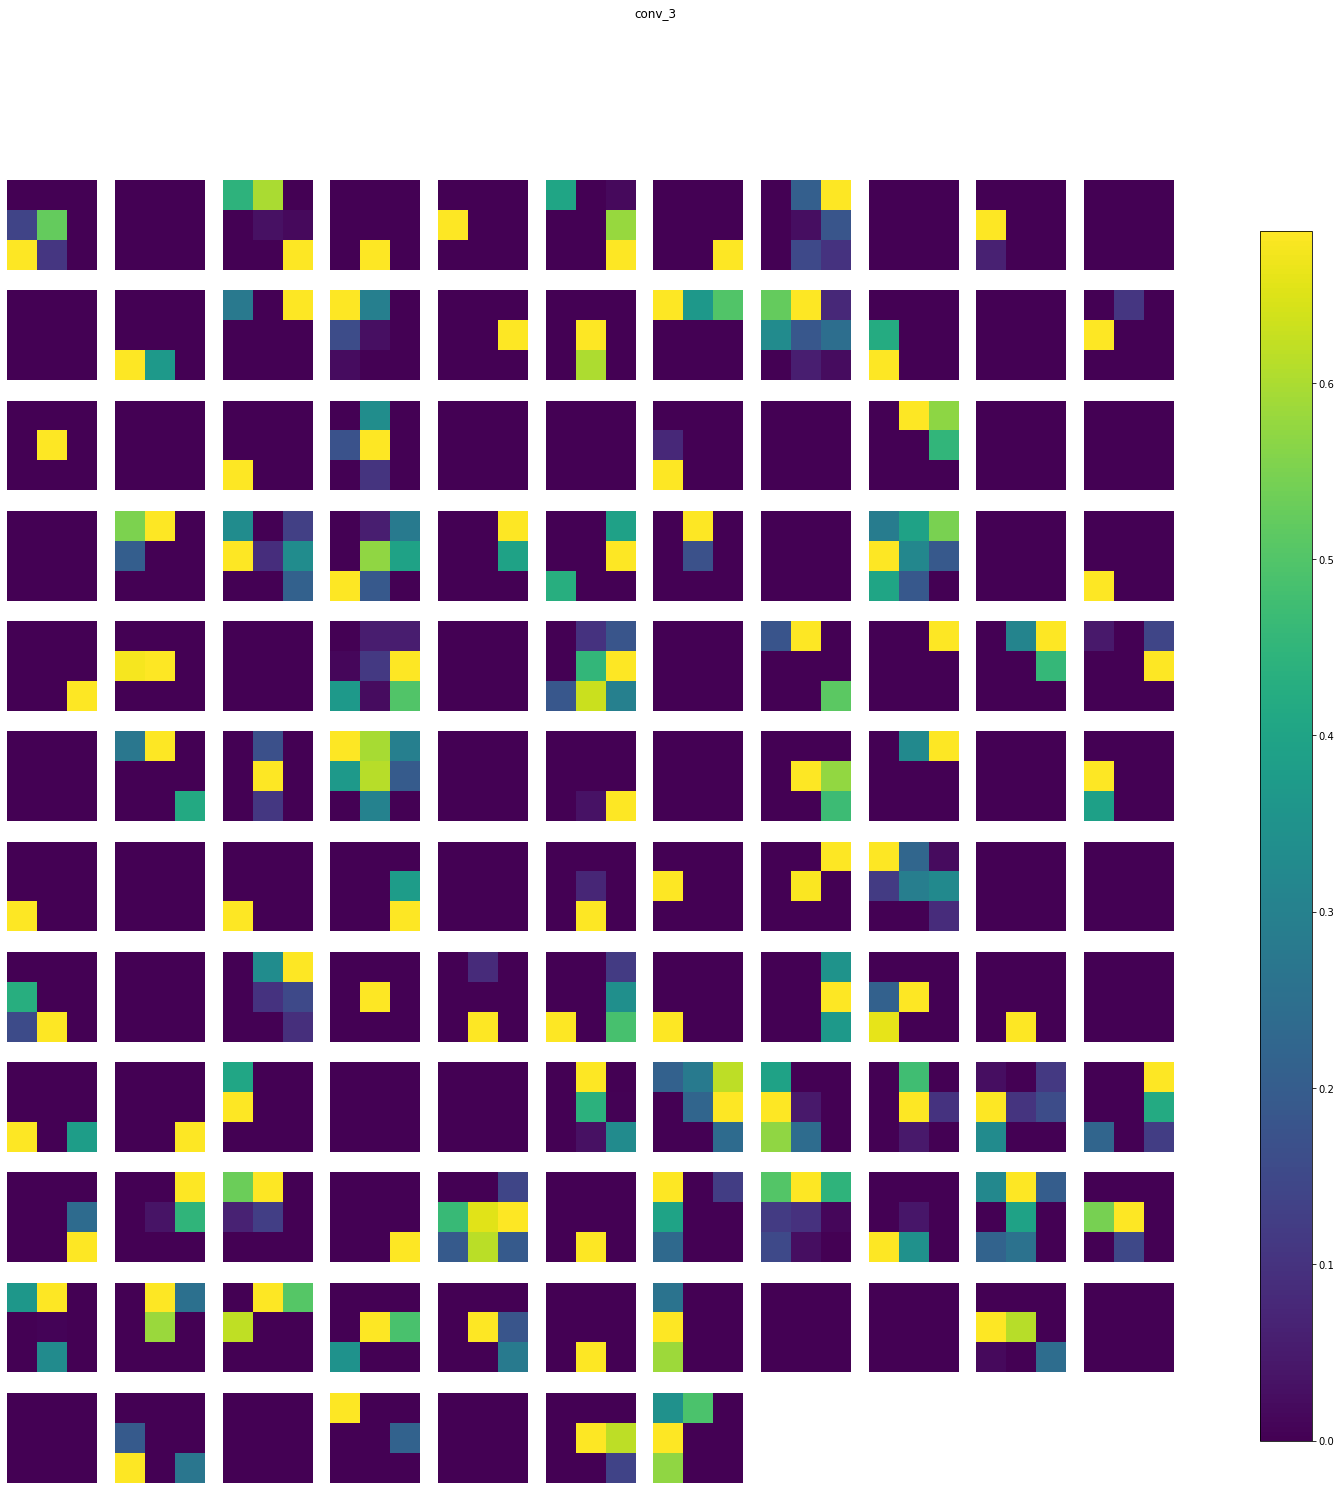

dense_1 (1, 128) 


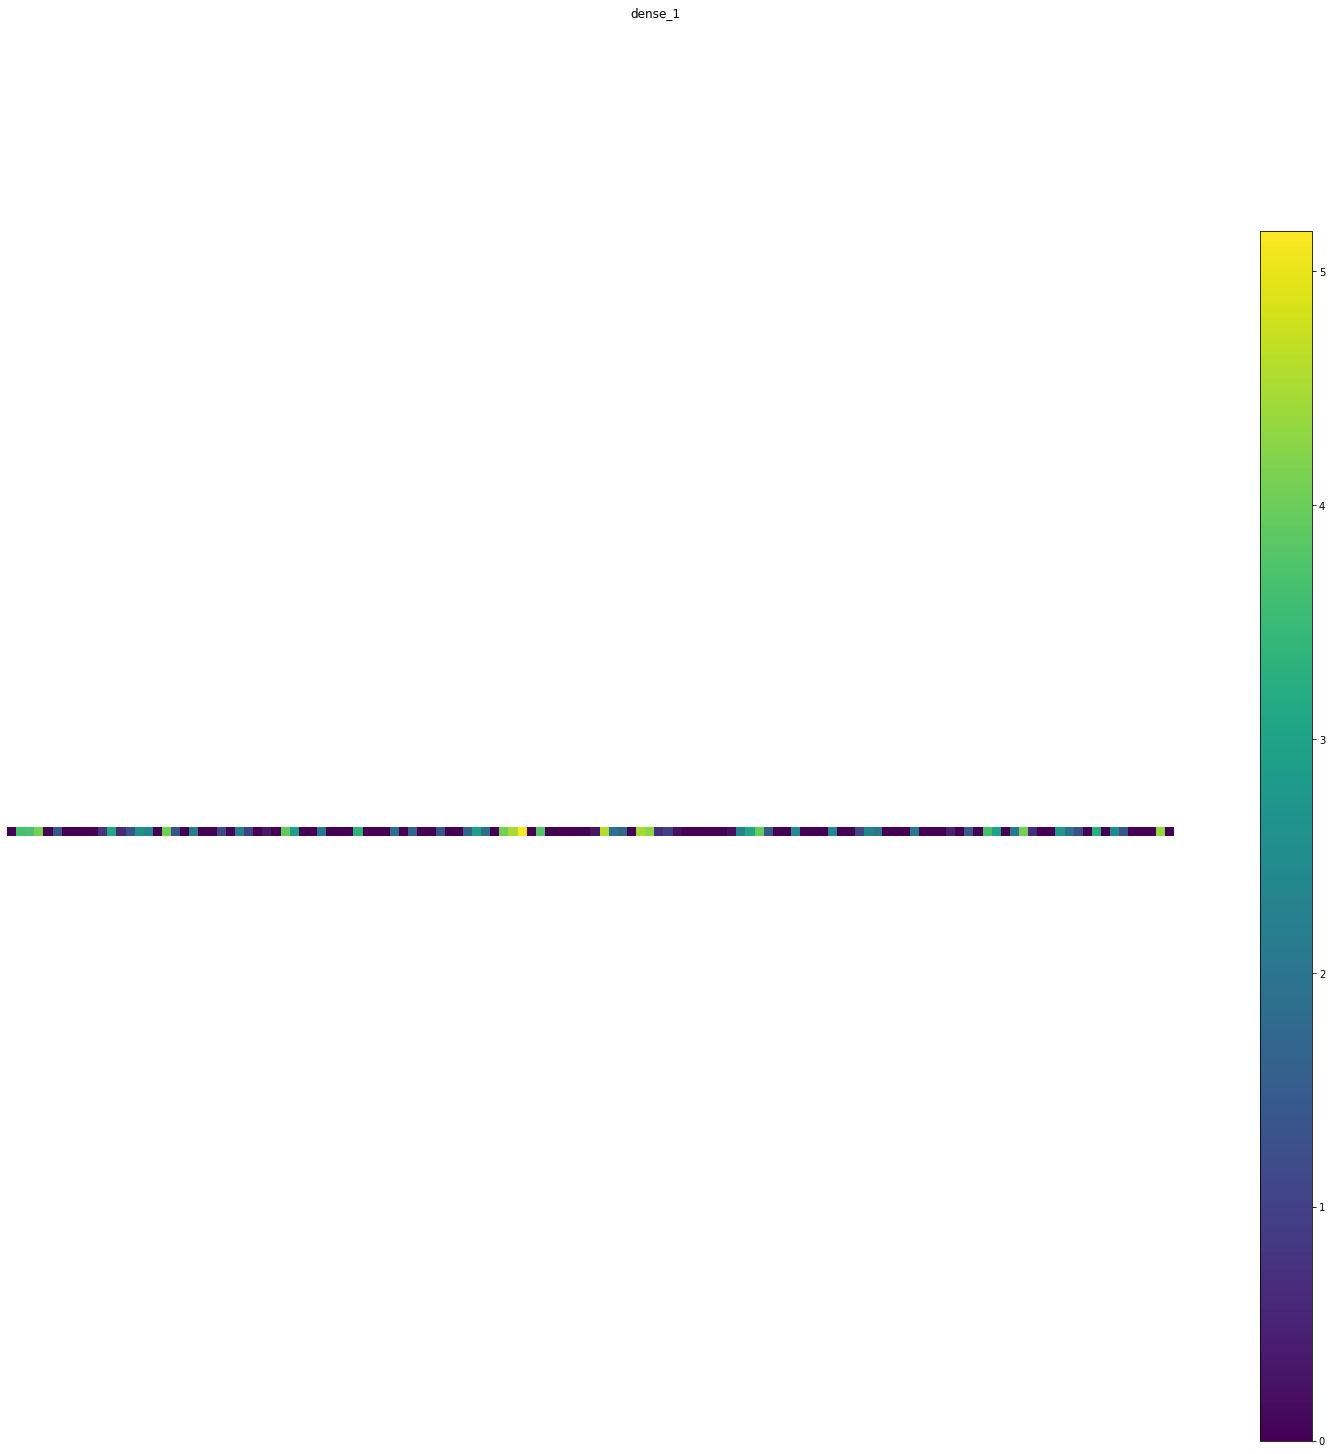

dense_2 (1, 10) 


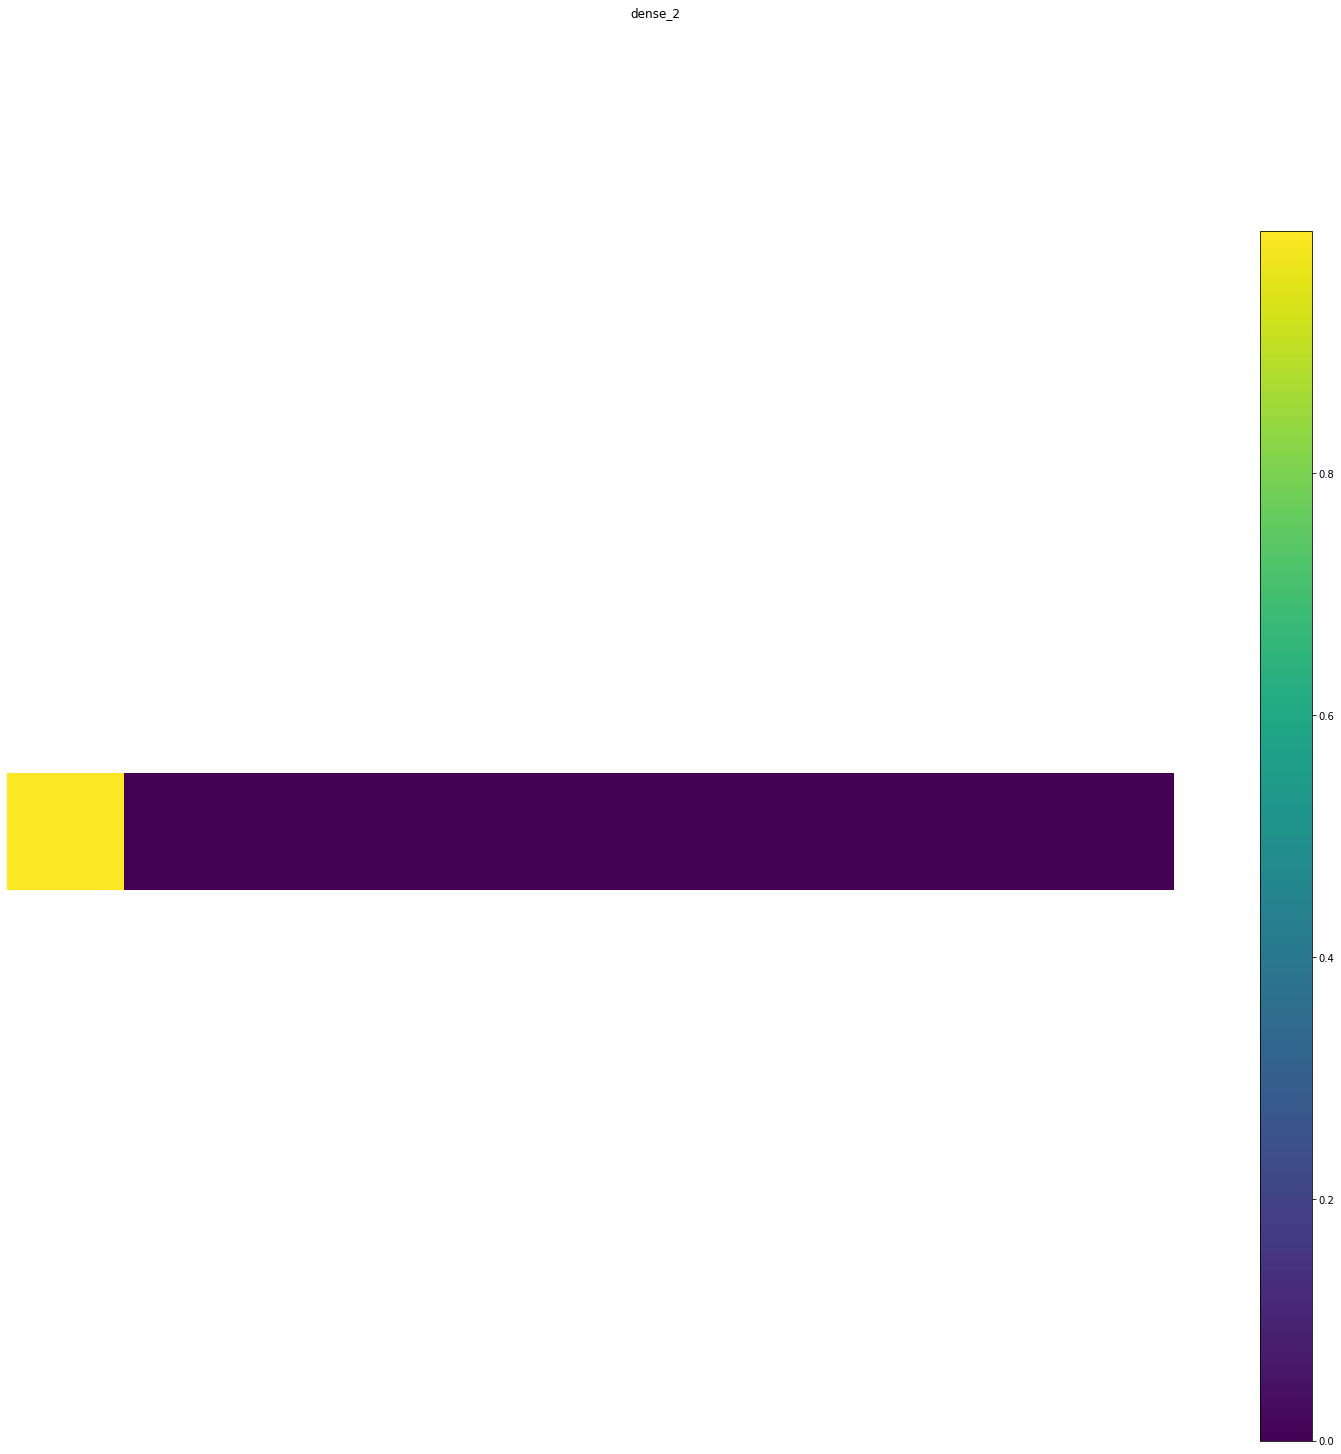

In [16]:
display_activations(activations_filtered)

## CNNs + Batch Normalization 

### Batch Norm after activation layer

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name='conv_1'), #28 height 28 width 1 channel
  tf.keras.layers.BatchNormalization(axis=-1), #axis=-1 use -1 if channels are the last dim in input shape
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', name='conv_2'),
  tf.keras.layers.BatchNormalization(axis=-1), #axis=-1 use -1 if channels are the last dim in input shape
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', name='conv_3'),
  tf.keras.layers.BatchNormalization(axis=-1), #axis=-1 use -1 if channels are the last dim in input shape
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_2')
])

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)      

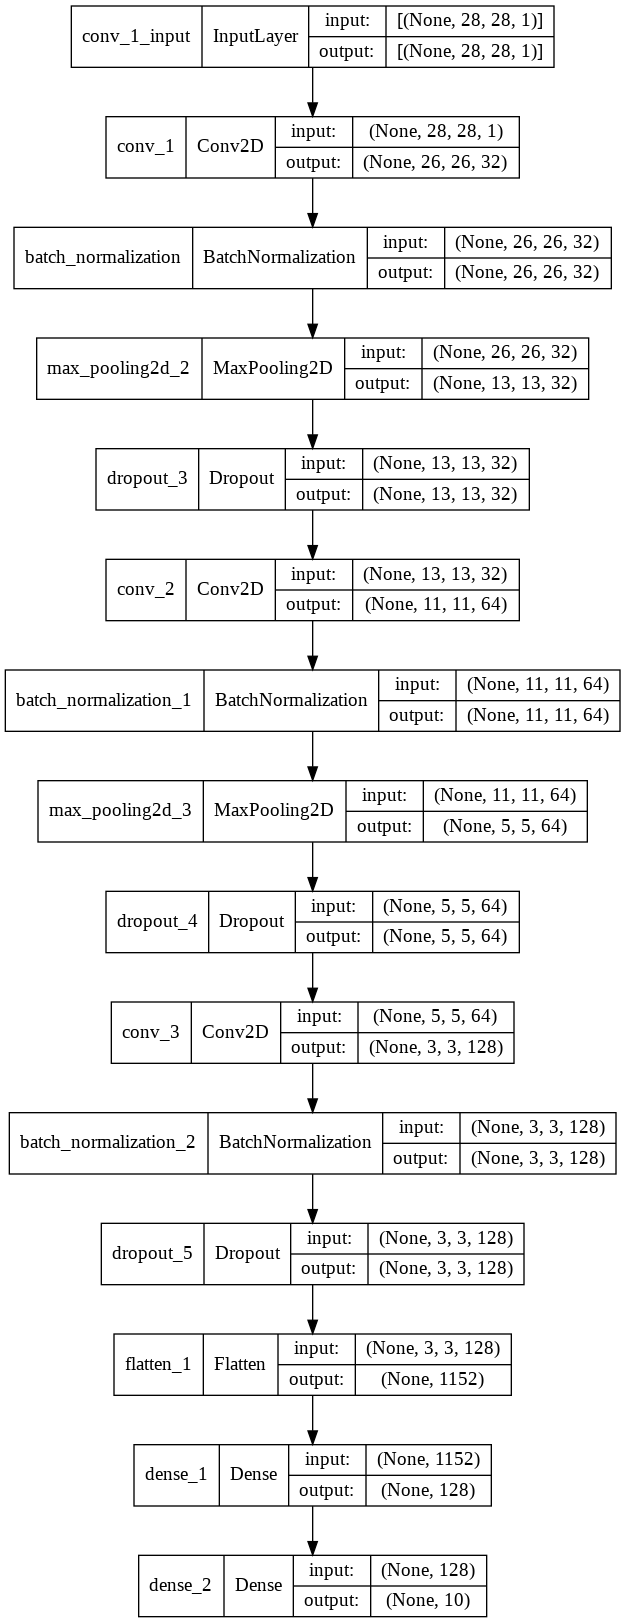

In [19]:
plot_model(model, show_shapes=True)

In [20]:
%%time

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                              verbose=1, patience=5)

history = model.fit(train_images, train_labels, epochs=100, batch_size=1000,
                    callbacks=[earlystopping],
                    shuffle=True, validation_split=0.2)

Epoch 1/100
48/48 [==============================] - 4s 66ms/step - loss: 0.7930 - accuracy: 0.7209 - val_loss: 2.3232 - val_accuracy: 0.1445
Epoch 2/100
48/48 [==============================] - 3s 61ms/step - loss: 0.4724 - accuracy: 0.8255 - val_loss: 2.5395 - val_accuracy: 0.1854
Epoch 3/100
48/48 [==============================] - 3s 61ms/step - loss: 0.4076 - accuracy: 0.8503 - val_loss: 2.2676 - val_accuracy: 0.3577
Epoch 4/100
48/48 [==============================] - 3s 61ms/step - loss: 0.3652 - accuracy: 0.8648 - val_loss: 2.1178 - val_accuracy: 0.4166
Epoch 5/100
48/48 [==============================] - 3s 61ms/step - loss: 0.3383 - accuracy: 0.8752 - val_loss: 2.0092 - val_accuracy: 0.4981
Epoch 6/100
48/48 [==============================] - 3s 61ms/step - loss: 0.3184 - accuracy: 0.8823 - val_loss: 1.3685 - val_accuracy: 0.6411
Epoch 7/100
48/48 [==============================] - 3s 61ms/step - loss: 0.3065 - accuracy: 0.8857 - val_loss: 1.3069 - val_accuracy: 0.6662
Epoch 

In [21]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2466 - accuracy: 0.9112

Test accuracy:  0.9111999869346619
